# 線形回帰 (Linear Regression)
---

+ 複数の変数における相関関係を直線モデルによって説明する分析手法


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


temp_list = [18, 25, 20, 27, 32, 22, 29, 19, 26, 30, 22, 28, 30]
cell_list = [22000, 64500, 27800, 81500, 112000, 46500, 98000, 26000, 69000, 99500, 55000, 78500, 87000]

d = np.array([temp_list, cell_list])
d = d.T

temp = d[:, 0]
cell = d[:, 1]

init_w0 = 0          # 初期値
init_w1 = 0          # 初期値
alpha = 0.01         # 学習率（適当）
iterations = 5000    # モデルを回す回数（適当）
[w0, w1] = run(d, init_w0, init_w1, alpha, iterations)
print([w0.round(2), w1.round(2)])

plt.plot(data[:, 0], data[:, 0]*w1+w0, 'r-', label='Linear Regression')

plt.scatter(temp, cell)
plt.xlabel('temp')
plt.ylabel('cell')
plt.grid(True)
plt.show()

<hr>

## 単回帰分析 (Simple Regression)
> 教師あり分析 (Superbaise learning)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('../csv/007-01.csv', delimiter=',', skiprows=1)

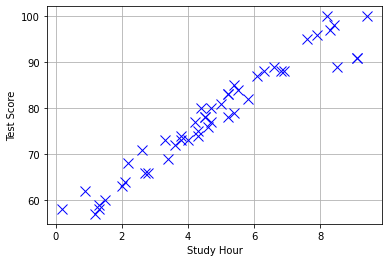

In [3]:
# データ確認(可視化)
plt.plot(data[:, 0], data[:, 1], 'bx', markersize=10, label='Traning')
plt.ylabel('Test Score')
plt.xlabel('Study Hour')
plt.grid(True)
plt.show()    # 強い正の線形関係

In [4]:
# コスト関数
def cost(w0, w1, data):
    cost = 0
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        cost += ((w1 * x + w0)-y)**2 # Σの意味合い
    cost = cost / (len(data)*2)
    return cost

In [5]:
# e.g.
w0, w1 = 0, 0
cost_0 = cost(w0, w1, data)
print(cost_0.round(0))

3128.0


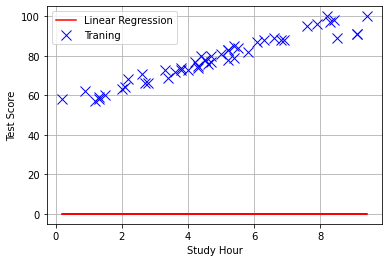

In [6]:
# 線形図
plt.plot(data[:, 0], data[:, 0]*w1+w0, 'r-', label='Linear Regression')

# 散布図
plt.plot(data[:, 0], data[:, 1], 'bx', markersize=10, label='Traning')

plt.ylabel('Test Score')
plt.xlabel('Study Hour')
plt.legend()
plt.grid(True)
plt.show()  

∴ ```(w０,w１)=(0,0)```は、```コスト＝３１２８```　より明らかにフィットしていない。

---


In [7]:
def gradientDescent(w0_in, w1_in, data, alpha):
    w0_gradient = 0
    w1_gradient = 0
    m = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        w0_gradient += (1/m)*(((w1_in*x)+w0_in)-y)
        w1_gradient += (1/m)*((((w1_in*x)+w0_in)-y)*x)
    w0_out = w0_in-(alpha*w0_gradient)
    w1_out = w1_in-(alpha*w1_gradient)
    return [w0_out, w1_out]

In [8]:
# 単回帰分析実行関数
def run(data, init_w0, init_w1, alpha, iterations):
    w0 = init_w0
    w1 = init_w1
    
    for i in range(iterations):
        w0, w1 = gradientDescent(w0, w1, np.array(data), alpha)
        
    return [w0, w1]

In [9]:
# modules
init_w0 = 0          # 初期値
init_w1 = 0          # 初期値
alpha = 0.01         # 学習率（適当）
iterations = 5000    # モデルを回す回数（適当）

[w0, w1] = run(data, init_w0, init_w1, alpha, iterations)
print([w0.round(2), w1.round(2)])

[55.19, 4.81]


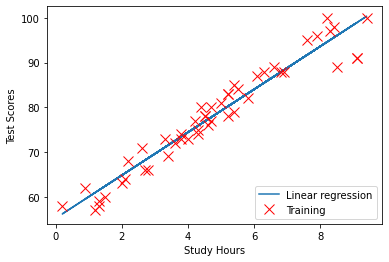

In [10]:
# 線形図
plt.plot(data[:, 0],data[:, 0]*w1+w0,'-', label='Linear regression')

# 散布図
plt.plot(data[:, 0],data[:, 1], 'rx', markersize=10, label='Training')

plt.xlabel('Study Hours')
plt.ylabel('Test Scores')
plt.legend(loc='lower right')
plt.show()

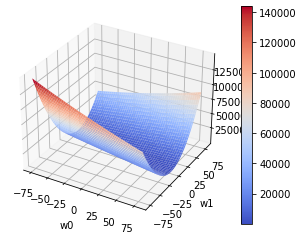

In [11]:
# 3D plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm    # color map

w0_vals = np.linspace(-75, 80, 100)
w1_vals = np.linspace(-75, 80, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        J_vals[i,j] = cost(w0_vals[i], w1_vals[j], data)
J_vals = np.transpose(J_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')

w0_g, w1_g = np.meshgrid(w0_vals, w1_vals) # necessary for 3D graph

surf = ax.plot_surface(w0_g, w1_g, J_vals, cmap=cm.coolwarm, rstride=2, cstride=2)
fig.colorbar(surf)
plt.xlabel('w0')
plt.ylabel('w1')
plt.show()

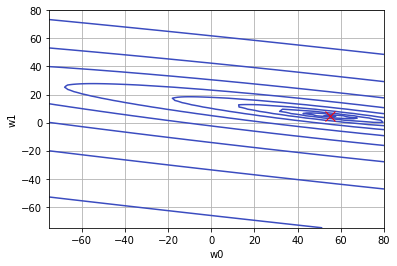

In [12]:
cset = plt.contour(w0_vals, w1_vals, J_vals, np.logspace(-4, 9, 30), cmap=cm.coolwarm)
fig.colorbar(cset)
plt.xlabel('w0')
plt.ylabel('w1')
plt.plot(w0, w1, 'rx', markersize=10, linewidth=2)
plt.grid(True)
plt.show(block=False)

<hr>

## 重回帰分析(multiple linear egression)
> 教師あり分析

In [13]:
# Libraly
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
# Read CSV file
data = np.loadtxt('../csv/007-02.csv', delimiter=',', skiprows=1)
x = data[:, :3]    #全行〜カラム３まで
y = data[:, 3]
m = len(y)

In [15]:
x

array([[ 64.,  67.,  69.],
       [ 74.,  74.,  63.],
       [ 60.,  59.,  55.],
       [ 84.,  88.,  89.],
       [ 80.,  88.,  78.],
       [ 75.,  68.,  68.],
       [ 66.,  59.,  55.],
       [ 77.,  71.,  66.],
       [ 70.,  71.,  60.],
       [ 89.,  84.,  80.],
       [ 73.,  76.,  69.],
       [ 78.,  74.,  63.],
       [ 67.,  63.,  67.],
       [ 80.,  81.,  83.],
       [ 72.,  75.,  73.],
       [ 68.,  63.,  76.],
       [ 81.,  89.,  80.],
       [ 64.,  66.,  59.],
       [ 79.,  81.,  79.],
       [ 70.,  76.,  69.],
       [ 76.,  80.,  68.],
       [ 71.,  64.,  75.],
       [ 81.,  77.,  84.],
       [ 85.,  83.,  87.],
       [ 61.,  67.,  70.],
       [ 74.,  71.,  75.],
       [ 85.,  82.,  78.],
       [ 60.,  60.,  57.],
       [ 83.,  88.,  80.],
       [ 85.,  80.,  76.],
       [ 84.,  86.,  86.],
       [ 82.,  79.,  88.],
       [ 68.,  66.,  60.],
       [ 89.,  85.,  88.],
       [ 85.,  90.,  85.],
       [ 68.,  66.,  62.],
       [ 74.,  76.,  82.],
 

In [16]:
y

array([68., 67., 57., 91., 82., 63., 65., 73., 67., 85., 82., 67., 57.,
       74., 83., 71., 85., 69., 87., 71., 80., 66., 73., 90., 61., 73.,
       84., 52., 92., 87., 80., 83., 71., 91., 98., 61., 77., 81., 60.,
       73., 58., 57., 69., 69., 97., 57., 70., 70., 99., 62., 75., 67.,
       73., 86., 87., 80., 74., 87., 83., 74., 75., 73., 93., 69., 83.,
       75., 86., 89., 75., 97., 76., 71., 89., 78., 67., 58., 57., 80.,
       79., 72., 54., 85., 83., 58., 74., 67., 56., 76., 65., 78., 90.,
       70., 92., 78., 89., 65., 93., 69., 57.])

In [17]:
m

99

In [18]:
data.shape[1]

4

In [19]:
x.shape

(99, 3)

In [20]:
# （試しに10行確認）
for i in range(10):
    print('x = [{:.0f} {:.0f} {:.0f}], y = {:.0f}'.format(x[i,0], x[i,1], x[i,2], y[i]))

x = [64 67 69], y = 68
x = [74 74 63], y = 67
x = [60 59 55], y = 57
x = [84 88 89], y = 91
x = [80 88 78], y = 82
x = [75 68 68], y = 63
x = [66 59 55], y = 65
x = [77 71 66], y = 73
x = [70 71 60], y = 67
x = [89 84 80], y = 85


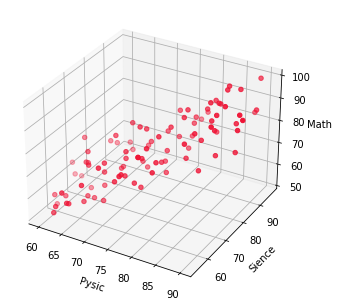

In [22]:
# データの確認（可視化）
# (特徴量が３つなので４次元になってしまうが不可、そこで、ターゲットと、特徴量２つを抜粋してプロッティングしていく)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 3], color='#ef1234')    # (x軸特徴量, y軸特徴量, Z軸ターゲット)
ax.set_xlabel('Pysic')   # 特徴量
ax.set_ylabel('Sience')  # 特徴量
ax.set_zlabel('Math')    # Target
plt.show()

### 正規化（FeatureScaling Normalization）

In [23]:
# 正規化 （標準化:Z-score Normalization)
def norm(X):
    #初期値
    X_norm = np.zeros((X.shape[0], X.shape[1])) #zeros((row, col)):指定行列だけ「０」を吐く  #99行３列ndarry作成
    mean = np.zeros((1, X.shape[1]))            #1行3列 ndarry作成
    std = np.zeros((1, X.shape[1]))             #1行3列 ndarry作成
    #各科目毎の平均、標準偏差を求める
    for i in range(X.shape[1]):         #0~3列回
        mean[:, i] = np.mean(X[:, i])   #各特徴量の平均値を格納
        std[:, i] = np.std(X[:, i])     #各特徴量の標準偏差を格納
        X_norm[:, i] = (X[:,i]-float(mean[:,i]))/float(std[:,i])
    return X_norm, mean, std

In [24]:
x[0:5,] # 正規化前

array([[64., 67., 69.],
       [74., 74., 63.],
       [60., 59., 55.],
       [84., 88., 89.],
       [80., 88., 78.]])

In [32]:
X_norm, mean, std = norm(x)
print(X_norm[0:5,])    #正規化後 0~5行
print()
print('mean = ', mean[0:5,].round(2))
print('std = ', std[0:5,].round(2))

[[-1.28095057 -0.76202794 -0.45626449]
 [-0.10238081 -0.05223579 -1.002678  ]
 [-1.75237847 -1.57321897 -1.73122936]
 [ 1.07618895  1.36734852  1.36511391]
 [ 0.60476105  1.36734852  0.36335579]]

mean =  [[74.87 74.52 74.01]]
std =  [[ 8.48  9.86 10.98]]


In [27]:
X_norm.mean()    # １０^-16 ∴限りなく０

1.4354398702224247e-16

In [28]:
X_norm.std()     # 1

1.0

### 重回帰分析（コスト関数）：　y_hat = XW

In [33]:
# モデル式 パラメーターのベクトル式(W):初期値
weight_int = np.zeros((4, 1))
print(weight_int)

[[0.]
 [0.]
 [0.]
 [0.]]


In [35]:
# 特徴量前処理
X_padded = np.column_stack((np.ones((m,1)), X_norm)) #column_stack((行列1,行列2))
print(X_padded[0:5,])    #[[w0 w1 w2 w3]]

[[ 1.         -1.28095057 -0.76202794 -0.45626449]
 [ 1.         -0.10238081 -0.05223579 -1.002678  ]
 [ 1.         -1.75237847 -1.57321897 -1.73122936]
 [ 1.          1.07618895  1.36734852  1.36511391]
 [ 1.          0.60476105  1.36734852  0.36335579]]


In [36]:
# コスト関数
def cost(X, y, weight):
    # 初期値
    m = len(y)
    J = 0
    # 計算式
    y_hut = X.dot(weight)
    diff = np.power((y_hut - np.transpose([y])),2)
    J = (1.0/(m*2))*diff.sum(axis=0)
    return J

In [39]:
# コスト関数確認(パラメーターテスト)
weight_test = np.array([[20],
                        [10],
                        [5],
                        [-1]])

cost(X_padded, y, weight_test).round(2)

array([1541.35])

In [41]:
# コスト関数（ベクトル化 ver.）
def cost2(X, y, weight):
    # 初期値
    m = len(y)     #(1, 99)
    J = 0
    # 計算式
    y_shaped = y.reshape(len(y), 1) #99行1列にreshape (99,1)
    model = np.dot(X, weight)
    delta = np.dot((model-y_shaped).T, (model-y_shaped))
    J = delta/(m*2)
    return J

In [43]:
cost2(X_padded, y, weight_test).round(2)

array([[1541.35]])

<hr>

### 最急降下法（Gradient Disent）

In [47]:
# 学習率（alpha）　学習回数（iteration）
alpha = 0.01
num_itrs = 500

In [48]:
# 最急降下法（Gradient Descent）:パラメーターを更新する
def gradientDescent(X, y, weight, alpah, iterations):
    m = len(y)
    J_history = np.zeros((iterations, 1))  #e.g.(500,1) # （余力）コストの履歴
    
    for i in range(iterations):
        weight = weight - alpha*(1.0/m)*np.transpose(X).dot(X.dot(weight)-np.transpose([y]))
        J_history[i] = cost(X, y, weight)
    return weight, J_history

In [49]:
weight_int

array([[0.],
       [0.],
       [0.],
       [0.]])

In [50]:
weight, J_history = gradientDescent(X_padded, y, weight_int, alpha, num_itrs)

In [51]:
weight.round(1)    # 最適パラメーター抽出 [[w0],[w1],[w2],[w3]]

array([[74.6],
       [ 2.2],
       [ 5.5],
       [ 3.2]])

In [52]:
# print(J_history[0:10].round(2))

for i in range(J_history.size):
    print('{}回目： cost = {}' .format(i, J_history[i].round(1)))

0回目： cost = [2824.1]
1回目： cost = [2766.5]
2回目： cost = [2710.1]
3回目： cost = [2655.]
4回目： cost = [2601.]
5回目： cost = [2548.2]
6回目： cost = [2496.5]
7回目： cost = [2445.9]
8回目： cost = [2396.3]
9回目： cost = [2347.8]
10回目： cost = [2300.3]
11回目： cost = [2253.8]
12回目： cost = [2208.3]
13回目： cost = [2163.8]
14回目： cost = [2120.1]
15回目： cost = [2077.4]
16回目： cost = [2035.6]
17回目： cost = [1994.6]
18回目： cost = [1954.5]
19回目： cost = [1915.2]
20回目： cost = [1876.8]
21回目： cost = [1839.1]
22回目： cost = [1802.2]
23回目： cost = [1766.1]
24回目： cost = [1730.7]
25回目： cost = [1696.1]
26回目： cost = [1662.1]
27回目： cost = [1628.9]
28回目： cost = [1596.3]
29回目： cost = [1564.5]
30回目： cost = [1533.2]
31回目： cost = [1502.6]
32回目： cost = [1472.6]
33回目： cost = [1443.3]
34回目： cost = [1414.5]
35回目： cost = [1386.4]
36回目： cost = [1358.8]
37回目： cost = [1331.7]
38回目： cost = [1305.2]
39回目： cost = [1279.3]
40回目： cost = [1253.9]
41回目： cost = [1229.]
42回目： cost = [1204.6]
43回目： cost = [1180.7]
44回目： cost = [1157.2]
45回目： cost = [1134.3]
4

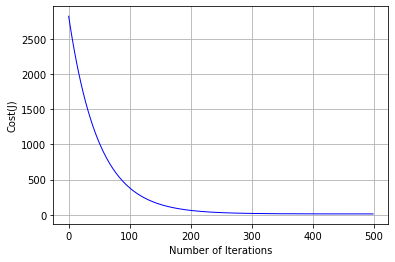

In [53]:
# コストと学習回数のグラフ
plt.plot(range(J_history.size), J_history, '-b', linewidth=1)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost(J)')
plt.grid(True)
plt.show()

徐々にコストが低減している。（∴より精度が高まっている。）
<hr>

In [ ]:
# 最適パラメーター確認
for i in range(weight.size):
    print('w{} = {}' .format(i, weight[i].round(3)))
# w0:1
# w1:Pysics
# w2:Sciencs
# w3:Statistics

In [54]:
# 数学点数予測 = （物理点数＊w１）＋（化学点数＊w２）＋（統計学点数＊w３）＋w０

# e.g.) N君　物理：７６点 化学:９６点 統計:８２点
# i)正規化
pysics_norm = (76-float(mean[:,0])) /float(std[:,0])
sciencs_norm = (96-float(mean[:,1])) /float(std[:,1])
statistics_norm = (82-float(mean[:,2])) /float(std[:,2])


In [55]:
# ii)x0を追加
pred_padded = np.array([1, pysics_norm, sciencs_norm, statistics_norm])
pred_padded

array([1.        , 0.13333314, 2.17853956, 0.72763147])

In [57]:
# N君の数学点数をモデルを用いて予測
pred = pred_padded.dot(weight)
pred.round(2)

array([89.1])